# Project Portfolio Analysis on Weather Dataset

<img src = 'Weather.jpg' Style = 'width:240px;height:300px'>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading, performing exploratory data analysis and cleaning the dataset

In [2]:
df = pd.read_csv('Weather.csv')

In [3]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


In [4]:
df.shape

(8784, 8)

In [5]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
df.dtypes

Date/Time            object
Temp_C              float64
Dew Point Temp_C    float64
Rel Hum_%             int64
Wind Speed_km/h       int64
Visibility_km       float64
Press_kPa           float64
Weather              object
dtype: object

In [8]:
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [11]:
df.describe(include = 'object')

,Date/Time,Weather
count,8784,8784
unique,8784,50
top,1/1/2012 0:00,Mainly Clear
freq,1,2106


In [12]:
df['Weather'].nunique()

50

In [13]:
df.rename(columns = {'Weather':'Weather Conditions'}, inplace = True)

In [14]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Conditions
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


## Most occuring weather conditions

In [15]:
Top_10_Weather_Conditions = df['Weather Conditions'].value_counts()[:10]
Top_10_Weather_Conditions

Weather Conditions
Mainly Clear     2106
Mostly Cloudy    2069
Cloudy           1728
Clear            1326
Snow              390
Rain              306
Rain Showers      188
Fog               150
Rain,Fog          116
Drizzle,Fog        80
Name: count, dtype: int64

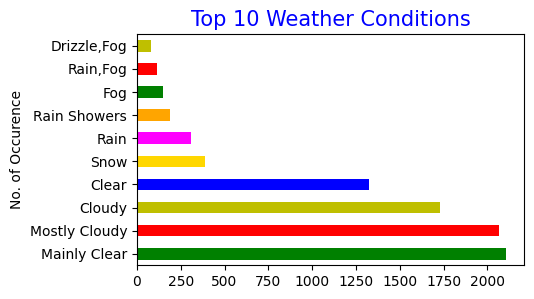

In [16]:
plt.figure(figsize = (5,3))
Top_10_Weather_Conditions.plot(kind = 'barh', color = ['g', 'r', 'y', 'blue', 'gold', 'magenta', 'orange'])
plt.title('Top 10 Weather Conditions', fontsize = 15, color = 'b')
plt.ylabel('No. of Occurence')
plt.show()

### It could be observed that weather is mainly clear, then followed by it is mainly cloudy and then cloudy.

In [17]:
df.head(1)

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Conditions
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog


In [18]:
Speed_Visibility = pd.DataFrame(df[(df['Wind Speed_km/h'] > 24) & (df['Visibility_km'] == 25)].value_counts())
Speed_Visibility

,,,,,,,,count
Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Conditions,
1/1/2012 23:00,5.3,2.0,79,30,25.0,99.31,Cloudy,1
2/26/2012 4:00,-10.8,-15.3,69,30,25.0,101.60,Mostly Cloudy,1
2/5/2012 23:00,-1.5,-5.7,73,30,25.0,100.93,Cloudy,1
2/5/2012 22:00,-2.1,-6.7,71,28,25.0,101.06,Cloudy,1
2/5/2012 21:00,-2.5,-7.7,67,26,25.0,101.18,Cloudy,1
...,...,...,...,...,...,...,...,...
10/30/2012 5:00,13.7,10.5,81,37,25.0,99.32,Mainly Clear,1
10/30/2012 4:00,13.8,10.4,80,35,25.0,99.28,Mostly Cloudy,1
10/30/2012 3:00,13.9,10.6,80,41,25.0,99.21,Rain Showers,1


## Weather Conditions with the lowest temperatures

In [19]:
Weather_Temp = df.groupby('Weather Conditions')['Temp_C'].mean()
Weather_Temp_sort = Weather_Temp.sort_values(ascending = False)
Lowest_weather_temp = Weather_Temp_sort.tail(10)
Lowest_weather_temp

Weather Conditions
Freezing Rain,Snow Grains     -5.000000
Snow,Fog                      -5.075676
Freezing Drizzle,Snow         -5.109091
Snow,Blowing Snow             -5.410526
Freezing Drizzle,Haze         -5.433333
Moderate Snow,Blowing Snow    -5.450000
Moderate Snow                 -5.525000
Freezing Drizzle              -5.657143
Freezing Fog                  -7.575000
Snow Showers,Fog             -10.675000
Name: Temp_C, dtype: float64

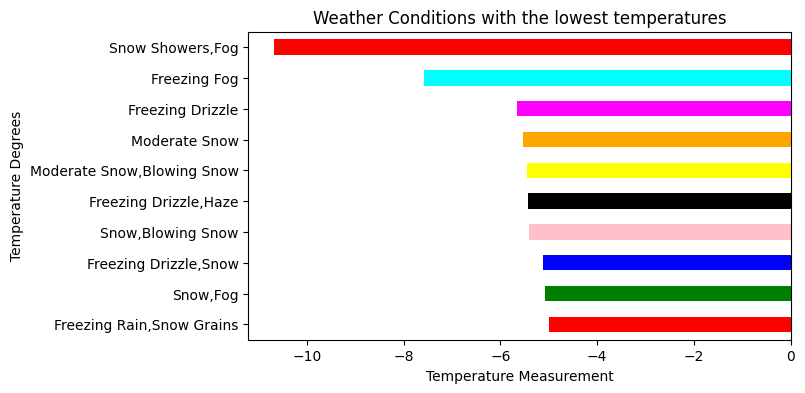

In [20]:
plt.figure(figsize = (7,4))
Lowest_weather_temp.plot(kind = 'barh', color = ['r', 'green', 'blue', 'pink', 'black', 'yellow', 'orange', 'magenta', 'cyan'])
plt.title('Weather Conditions with the lowest temperatures')
plt.xlabel('Temperature Measurement')
plt.ylabel('Temperature Degrees')
plt.show()

### The coldest weather conditions are 'Freezing Rain and Snow Grains, followed by Fog and then Freezing Drizzle.

## Weather Conditions with the highest temperatures

In [21]:
High_Temp = df.groupby('Weather Conditions')['Temp_C'].sum()
High_Temp = High_Temp.sort_values(ascending = False)[:10]
High_Temp

Weather Conditions
Mainly Clear                  26449.1
Mostly Cloudy                 21878.2
Cloudy                        13773.1
Clear                          9050.9
Rain                           2994.6
Rain Showers                   2579.8
Rain,Fog                        959.7
Fog                             645.5
Drizzle,Fog                     645.4
Thunderstorms,Rain Showers      320.6
Name: Temp_C, dtype: float64

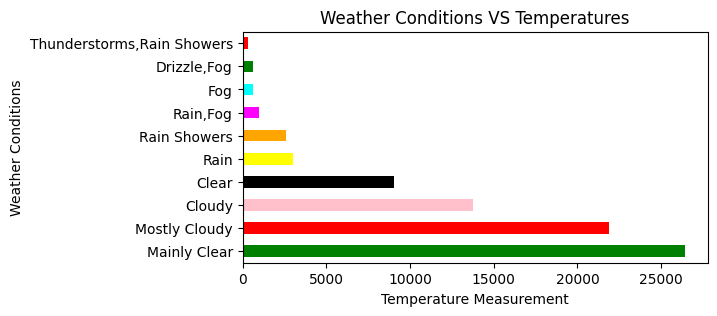

In [22]:
plt.figure(figsize = (6, 3))
High_Temp.plot(kind = 'barh', color = ['g', 'r', 'pink', 'black', 'yellow', 'orange', 'magenta', 'cyan'])
plt.title('Weather Conditions VS Temperatures')
plt.xlabel('Temperature Measurement')
plt.show()

### The hotest weather conditions occur when the weather is 'Mainly Clear', 'Mostly Cloudy' and 'Cloudy'.

## Finding all instances when 'Weather Conditions' is 'Clear' and 'Visibility' > 40

In [28]:
df['Weather Conditions'].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [29]:
df[(df['Weather Conditions'] == 'Clear') | (df['Weather Conditions'] == 'Mostly Cloudy')]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Conditions
16,1/1/2012 16:00,2.6,-0.2,82,13,12.9,99.93,Mostly Cloudy
26,1/2/2012 2:00,3.9,-0.9,71,32,25.0,99.26,Mostly Cloudy
27,1/2/2012 3:00,3.7,-1.5,69,33,25.0,99.30,Mostly Cloudy
28,1/2/2012 4:00,2.9,-2.3,69,32,25.0,99.26,Mostly Cloudy
29,1/2/2012 5:00,2.6,-2.3,70,32,25.0,99.21,Mostly Cloudy
...,...,...,...,...,...,...,...,...
8748,12/30/2012 12:00,-12.2,-15.7,75,26,48.3,100.91,Mostly Cloudy
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8756,12/30/2012 20:00,-13.8,-16.5,80,24,25.0,101.52,Clear
8759,12/30/2012 23:00,-12.1,-15.1,78,28,25.0,101.52,Mostly Cloudy


### It can be seen that we have 3027 rows of instances when 'Weather Conditions' is 'Clear' and 'Visibility' > 40¶

## Finding all instances when 'Weather Conditions' is 'Clear' and 'Relative Humidity' > 50 or 'Visibility' > 40

In [24]:
df[(df['Weather Conditions'] == 'Clear') & (df['Rel Hum_%'] > 50) | (df['Visibility_km'] > 40)]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Conditions
106,1/5/2012 10:00,-6.0,-10.0,73,17,48.3,100.45,Mainly Clear
107,1/5/2012 11:00,-5.6,-10.2,70,22,48.3,100.41,Mainly Clear
108,1/5/2012 12:00,-4.7,-9.6,69,20,48.3,100.38,Mainly Clear
109,1/5/2012 13:00,-4.4,-9.7,66,26,48.3,100.40,Mainly Clear
110,1/5/2012 14:00,-5.1,-10.7,65,22,48.3,100.46,Mainly Clear
...,...,...,...,...,...,...,...,...
8749,12/30/2012 13:00,-12.4,-16.2,73,37,48.3,100.92,Mostly Cloudy
8750,12/30/2012 14:00,-11.8,-16.1,70,37,48.3,100.96,Mainly Clear
8751,12/30/2012 15:00,-11.3,-15.6,70,32,48.3,101.05,Mainly Clear
8752,12/30/2012 16:00,-11.4,-15.5,72,26,48.3,101.15,Mainly Clear


### It can be deduced that we have 2921 rows of instances when 'Weather Conditions' is 'Clear' and 'Relative Humidity' > 50 or 'Visibility' > 40

## Total occurences of 'Fog' in 'Weather Conditions'

In [25]:
Fog = df[df['Weather Conditions'].str.contains('Fog')]
Fog

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather Conditions
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8739,12/30/2012 3:00,-9.1,-10.4,90,11,3.6,100.30,"Snow,Fog"
8740,12/30/2012 4:00,-9.3,-10.6,90,13,9.7,100.28,"Snow,Fog"
8741,12/30/2012 5:00,-9.1,-10.4,90,11,4.0,100.32,"Snow,Fog"
8742,12/30/2012 6:00,-9.3,-10.8,89,17,8.0,100.39,"Snow,Fog"


### Fog occurs 426 times in the dataset

SUMMARY
##### It could be observed that weather is mainly clear, then followed by it is mainly cloudy and then cloudy.
##### The coldest weather conditions are 'Freezing Rain and Snow Grains, followed by Fog and then Freezing Drizzle.
##### The hotest weather conditions occur when the weather is 'Mainly Clear', 'Mostly Cloudy' and 'Cloudy'.